# Case Study 2: Adopting Different Analytics Techniques

##### Overview
This project is a fashion project that addresses three different objectives within Lavender Lane's business setting. The first part addresses the sales and marketing team, the second addresses the executive team and the third addresses the AI and software engineering team.

In other words, 
- part 1 is to analyze the fashion dataset, gain insights from the dataset and present findings.

- part 2 is to conduct a hypothesis test.

- part 3 build a machine learning model algorithm.

##### About the Dataset
The dataset captures essential details of Fashion products and user interactions, providing insights into product characteristics, brand performance, pricing, and user preferences across various product categories.
It can be used for data analysis in areas like customer behavior, product popularity, pricing strategies, and inventory management.

## Part 1: The Sales and Marketing Team

The sales and marketing team have requested your insights to help them improve sales.

##### Questions projected
1. "How does the price distribution vary across different brands?"
2. How many products do most users tend to buy, and is there a common purchasing pattern?
3. Do factors like colors affect individual product purchases?
5. Which categories and brands are most popular? Are there certain brands that dominate specific categories?
4. What other factors affect the sales?

In [36]:
#pip install pingouin

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import pingouin
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [2]:
#loading datset
df= pd.read_csv("fashion_products.csv")

## Data Exploration

#### Data Inspection

In [3]:
#checking number of rows and columns

df.shape

(1000, 9)

In [4]:
#previewing first five rows
df.head()

,User ID,Product ID,Product Name,Brand,Category,Price,Rating,Color,Size
0,19,1,Dress,Adidas,Men's Fashion,40,1.043159,Black,XL
1,97,2,Shoes,H&M,Women's Fashion,82,4.026416,Black,L
2,25,3,Dress,Adidas,Women's Fashion,44,3.337938,Yellow,XL
3,57,4,Shoes,Zara,Men's Fashion,23,1.049523,White,S
4,79,5,T-shirt,Adidas,Men's Fashion,79,4.302773,Black,M


In [5]:
#Brief info on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   User ID       1000 non-null   int64  
 1   Product ID    1000 non-null   int64  
 2   Product Name  1000 non-null   object 
 3   Brand         1000 non-null   object 
 4   Category      1000 non-null   object 
 5   Price         1000 non-null   int64  
 6   Rating        1000 non-null   float64
 7   Color         1000 non-null   object 
 8   Size          1000 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


In [6]:
#statistical summary of the dataset
df.describe()

,User ID,Product ID,Price,Rating
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,50.41900,500.500000,55.785000,2.993135
std,28.78131,288.819436,26.291748,1.153185
min,1.00000,1.000000,10.000000,1.000967
25%,26.00000,250.750000,33.000000,1.992786
50%,50.00000,500.500000,57.000000,2.984003
75%,75.00000,750.250000,78.250000,3.985084
max,100.00000,1000.000000,100.000000,4.987964


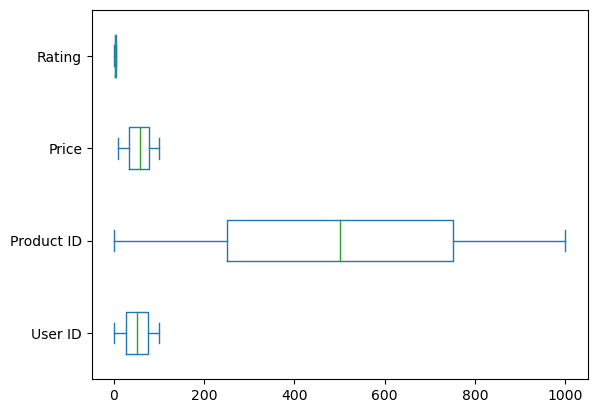

In [7]:
#visualizing if there are any outliers in our dataset
df.plot(kind= 'box', vert=False)
plt.show()

In [8]:
#Double-Checking for Nulls
df.isnull().sum().to_frame()

,0
User ID,0
Product ID,0
Product Name,0
Brand,0
Category,0
Price,0
Rating,0
Color,0
Size,0


In [9]:
#Checking for duplicates
df.duplicated().sum()

0

In [10]:
#checking the individual sizes in the dataset
df["Size"].unique()

array(['XL', 'L', 'S', 'M'], dtype=object)

In [11]:
#checking products in Lavender Lane's stock (dataset)
df["Product Name"].unique()

array(['Dress', 'Shoes', 'T-shirt', 'Jeans', 'Sweater'], dtype=object)

In [12]:
#checking unique colors in the dataset
df["Color"].unique()

array(['Black', 'Yellow', 'White', 'Blue', 'Green', 'Red'], dtype=object)

In [13]:
# checking unique brands in the dataset
df["Brand"].unique()

array(['Adidas', 'H&M', 'Zara', 'Gucci', 'Nike'], dtype=object)

In [14]:
# checking unique category in the dataset
df["Category"].unique()

array(["Men's Fashion", "Women's Fashion", "Kids' Fashion"], dtype=object)

#### After inspection, we noticed 
- the data types of many columns need to be changed.
- column rating must be round off to one decimal place.
- product id column will not help in our analysis hence can be dropped.
- some columns need renaming.
- a new column should be created for our rating metrics.

### Data Transformation

In [15]:
#Changing Data Types
df["Product Name"]= df["Product Name"].astype("category")
df["Brand"]= df["Brand"].astype("category")
df["Category"]= df["Category"].astype("category")
df["Color"]= df["Color"].astype("category")
df["Size"]= df["Size"].astype("category")
df["Price"]= df["Price"].astype("float")

In [16]:
#Rounding the rating column to one decimal place
df["Rating"]=round(df["Rating"],1)

In [17]:
#checking info if dtypes have changed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   User ID       1000 non-null   int64   
 1   Product ID    1000 non-null   int64   
 2   Product Name  1000 non-null   category
 3   Brand         1000 non-null   category
 4   Category      1000 non-null   category
 5   Price         1000 non-null   float64 
 6   Rating        1000 non-null   float64 
 7   Color         1000 non-null   category
 8   Size          1000 non-null   category
dtypes: category(5), float64(2), int64(2)
memory usage: 37.2 KB


In [18]:
#Dropping a column which will not be relevant in the analysis
data=df.drop(["Product ID"], axis=1)
data.head()

,User ID,Product Name,Brand,Category,Price,Rating,Color,Size
0,19,Dress,Adidas,Men's Fashion,40.0,1.0,Black,XL
1,97,Shoes,H&M,Women's Fashion,82.0,4.0,Black,L
2,25,Dress,Adidas,Women's Fashion,44.0,3.3,Yellow,XL
3,57,Shoes,Zara,Men's Fashion,23.0,1.0,White,S
4,79,T-shirt,Adidas,Men's Fashion,79.0,4.3,Black,M


In [19]:
#Renaming the columns
data=data.rename(columns={"User ID":"User_ID","Product Name":"Product", "Rating":"Rating_Scale"})
data.head()

,User_ID,Product,Brand,Category,Price,Rating_Scale,Color,Size
0,19,Dress,Adidas,Men's Fashion,40.0,1.0,Black,XL
1,97,Shoes,H&M,Women's Fashion,82.0,4.0,Black,L
2,25,Dress,Adidas,Women's Fashion,44.0,3.3,Yellow,XL
3,57,Shoes,Zara,Men's Fashion,23.0,1.0,White,S
4,79,T-shirt,Adidas,Men's Fashion,79.0,4.3,Black,M


In [20]:
#using the Rating_Scale as keys for our Rating metrics column
keys = data['Rating_Scale']  
keys_range = []
""" Creating an empty list for our metrics"""
for i in keys:
    if 1.0 <= i <= 1.9:
        keys_range.append('poor')
    elif 2.0 <= i <= 2.9:
        keys_range.append('fair')
    elif 3.0 <= i <= 3.9:
        keys_range.append('good')
    elif 4.0 <= i <= 4.9:
        keys_range.append('very good')
    else:
        keys_range.append('excellent')
        

#Now that we have our metrics, we can save it in the column it belongs to
data['Rating'] = keys_range
data['Rating'].head()       #preview column

0         poor
1    very good
2         good
3         poor
4    very good
Name: Rating, dtype: object

#### After transformation, 
- we can now analyze the data and gain insights.

### Data Analysis and Visualizations

In [21]:
#checking total prices by the brands in our dataset
total_prices_brands = data.groupby("Brand")["Price"].sum().to_frame()
total_prices_brands

,Price
Brand,
Adidas,10596.0
Gucci,10587.0
H&M,11168.0
Nike,12320.0
Zara,11114.0


In [22]:
#sorting values in descending order
total_prices_brands = total_prices_brands.sort_values(by = 'Price', ascending= False)
total_prices_brands

,Price
Brand,
Nike,12320.0
H&M,11168.0
Zara,11114.0
Adidas,10596.0
Gucci,10587.0


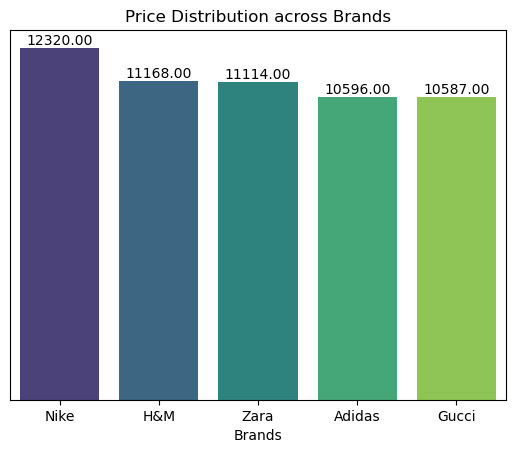

In [23]:
#visualizing brands by prices
v = sns.barplot(x = total_prices_brands.index, y = total_prices_brands['Price'], palette = 'viridis', order=total_prices_brands.index)
v.set_title('Price Distribution across Brands')
plt.xlabel('Brands')
plt.ylabel('Price')
v.set(yticks=[], ylabel= '')


#adding data labels set to 2 decimal places
v.bar_label(v.containers[0], fmt= '%.2f')

plt.show()

#### Price Distribution across Brands: 

The bar chart shows the distribution of sales prices across different brands.

Sales Prices and Trend among these brands : 
Nike brand has the highest sales price following through to Gucci with the lowest price.

In [24]:
#checking product distribution by average prices
average_prices_product = data.groupby("Product")["Price"].mean().to_frame()
average_prices_product

,Price
Product,
Dress,53.289773
Jeans,56.696970
Shoes,56.738739
Sweater,54.788235
T-shirt,56.711443


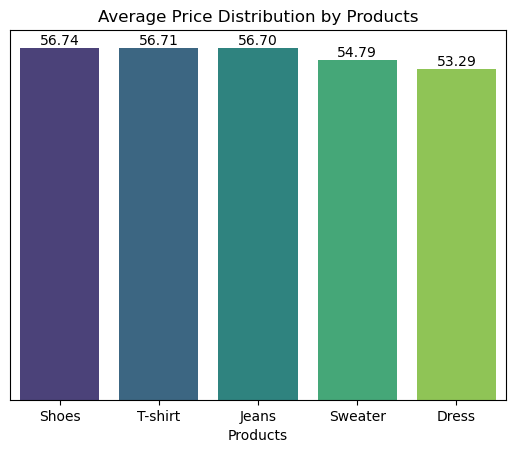

In [25]:
#sorting product values in descending order
average_prices_product = average_prices_product.sort_values(by = 'Price', ascending= False)

#visualizing brands by prices
g = sns.barplot(x = average_prices_product.index, y = average_prices_product['Price'], palette = 'viridis', order= average_prices_product.index)
g.set_title('Average Price Distribution by Products')
plt.xlabel('Products')
plt.ylabel('Price')
g.set(yticks=[], ylabel= '')


#adding data labels set to 2 decimal places
g.bar_label(g.containers[0], fmt= '%.2f')

plt.show()

In [26]:
#checking the count of category by products in the dataset
count_category_product = df.groupby("Category")["Product Name"].count().reset_index()

#sorting product values in descending order
count_category_product = count_category_product.sort_values(by = 'Product Name', ascending= False)
count_category_product

,Category,Product Name
0,Kids' Fashion,351
2,Women's Fashion,327
1,Men's Fashion,322


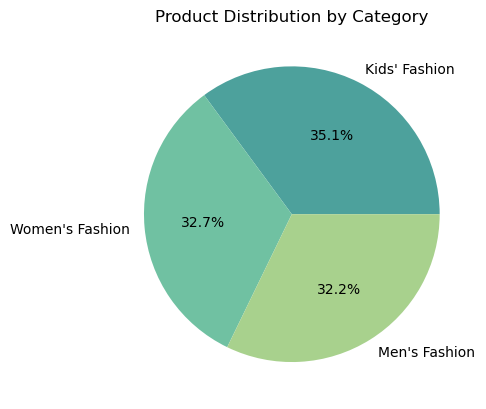

In [27]:
#visualizing category by products
custom_colors = ["#4DA19C", "#70C1A2", "#A8D18D"] 
q = plt.pie(count_category_product['Product Name'], labels = count_category_product['Category'], autopct= '%1.1f%%', colors= custom_colors)

#adding a title and labels to the chart
plt.title('Product Distribution by Category')

plt.show()

In [28]:
#checking color distribution by products in the dataset
count_color_product = data.groupby("Product")["Color"].count().reset_index()

#sorting color distribution by products in descending order
count_color_product = count_color_product.sort_values(by = 'Color', ascending= False)
count_color_product

,Product,Color
1,Jeans,231
2,Shoes,222
4,T-shirt,201
0,Dress,176
3,Sweater,170


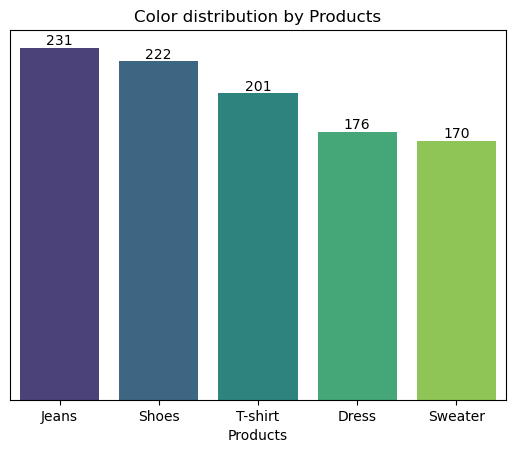

In [29]:
#visualizing color by products
h = sns.barplot(x = 'Product', y = 'Color', palette = 'viridis', data=count_color_product, order=count_color_product['Product'])
h.set_title('Color distribution by Products')
plt.xlabel('Products')
plt.ylabel('Color')
h.set(yticks=[], ylabel= '')


#adding data labels set to 2 decimal places
h.bar_label(h.containers[0])

plt.show()

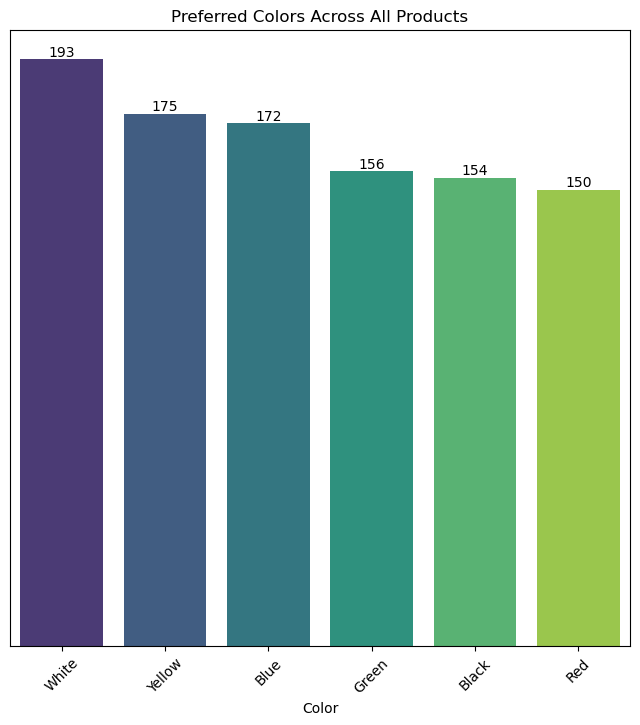

In [30]:
# Count the frequency of each color and sort by frequency in descending order
color_counts = data['Color'].value_counts().reset_index()
color_counts.columns = ['Color', 'Frequency']
color_counts = color_counts.sort_values(by='Frequency', ascending=False).reset_index(drop=True)

# Plot color frequencies
plt.figure(figsize=(8, 8))
plot=sns.barplot(data=color_counts, x='Color', y='Frequency', palette='viridis', order=color_counts['Color'])
plt.title('Preferred Colors Across All Products')
plt.xlabel('Color')
plt.xticks(rotation=45)
plot.get_yaxis().set_visible(False)
# Add data labels with more space above the bars
for i, v in enumerate(color_counts['Frequency']):
    plt.annotate(str(v), (i, v), ha='center', va='bottom', fontsize=10)  # Adjusted offset for better visibility

# Save the plot as a PNG file
plt.savefig('seaborn_plot2.png')

#Displaying chart
plt.show()

#### Distribution of Colors: 

The bar chart shows the distribution of preferred colors across different products.

Color Values and Trend among the category : 
White has the highest value (193) following throgh to Red with the lowest value (150).

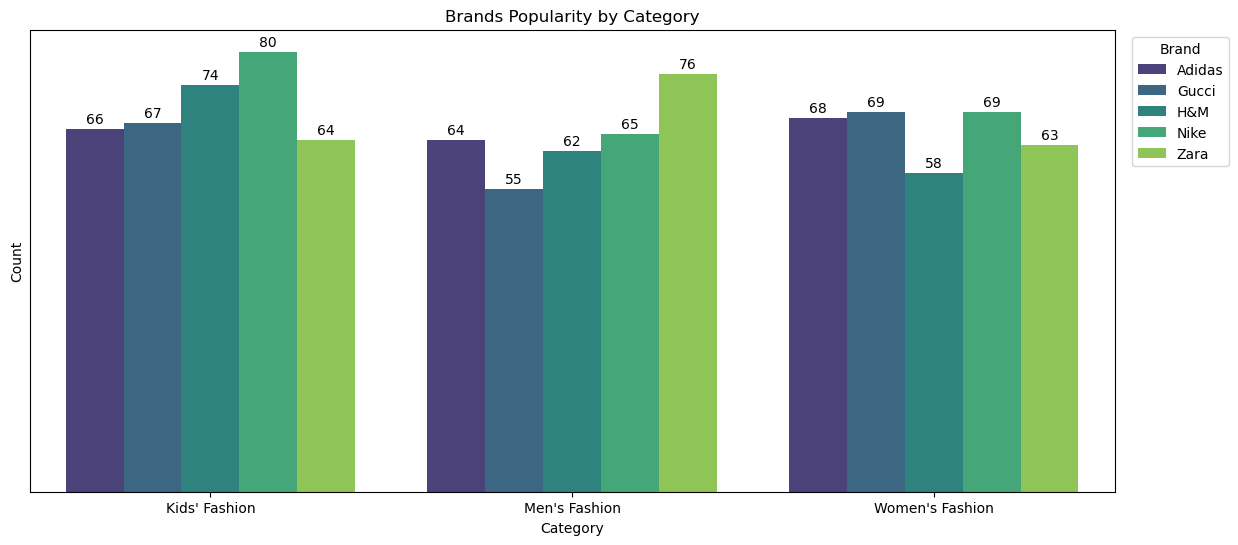

In [31]:
# Count the number of products in each category and brand combination
product_counts = df.groupby(['Category', 'Brand']).size().reset_index(name='Count')

#visualizing brand distribution across the different category in our dataset.
plt.figure(figsize=(14, 6))
ax = sns.barplot(x='Category', y='Count', hue='Brand', data=product_counts, palette='viridis')
plt.title('Brands Popularity by Category')
plt.xlabel('Category')
plt.ylabel('Count')

# Add data labels
for p in ax.patches:
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0f}', (x + p.get_width()/2, y + height+0.5), ha='center', va="bottom")

#Moving Legend
plt.legend(title='Brand', bbox_to_anchor=(1.01, 1), loc='upper left')

# Remove y-axis
plt.yticks([])

# Save the plot as a PNG file
plt.savefig('seaborn_plot4.png')

#Displaying chart
plt.show()

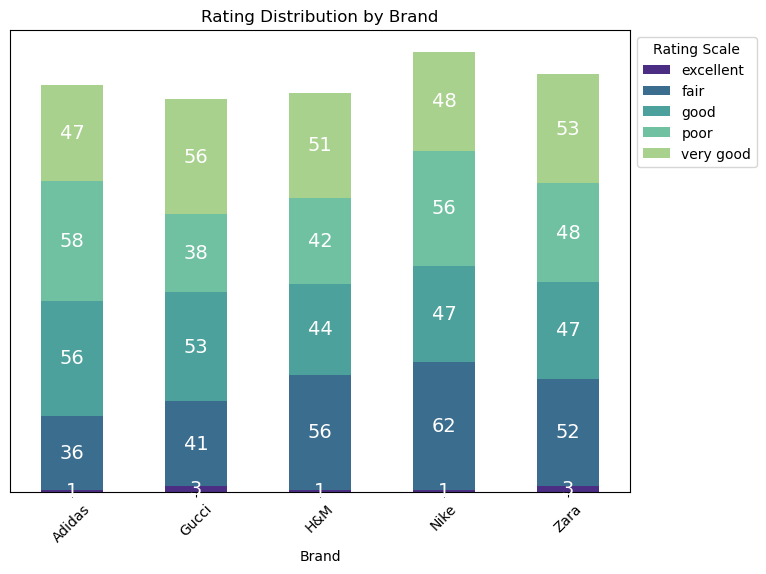

In [32]:
# Calculate the count of each rating per brand
rating_counts = data.groupby(['Brand', 'Rating']).size().unstack(fill_value=0)

# Define your custom colors with light green replacing yellow
custom_colors = ["#4B2E83", "#3B6D8F", "#4DA19C", "#70C1A2", "#A8D18D"] 


# Plot stacked bar chart to visualize rating across the different brands in stock.
fig, ax = plt.subplots(figsize=(8, 6))
rating_counts.plot(kind='bar', stacked=True, ax=ax, color=custom_colors)

plt.title('Rating Distribution by Brand')
plt.xlabel('Brand')
plt.xticks(rotation=45)
plt.legend(title='Rating Scale', bbox_to_anchor=(1.0, 1), loc='upper left')

# Remove y-axis
ax.yaxis.set_visible(False)

# Add data labels
for container in ax.containers:
    ax.bar_label(container, label_type='center', fmt='%d', fontsize=14, color='white')

# Save the plot as a PNG file
plt.savefig('seaborn_plot5.png')

#Displaying chart
plt.show()

##### Overall Analysis
- The analysis above clearly shows which areas across all categories, brands and products the sales and marketing team should focus to make more sales.
 

## Part 2: The Executive Team

##### Scenario
At the executive meeting, the marketing manager requested that the business invests more in digital marketing. Although the executives agree with the proposal, there is a disagreement on product brands influencing sales across all products in stock as part of the proposal.
The marketing manager argues that the different brands in stock have an effect on the average sales hence the business needs to focus on the brands ignoring the other factors.
 
The Board thinks focusing solely on the brands to make more sales will be an error. So, if the marketing manager can prove that the business should focus on the effects these brands have on sales, then they will go by her proposal. So, as the data analyst at the meeting, the Ceo tasked you to find out.

- Null hypothesis (H0): The different brands have significant influence on average sales across products.

In [36]:
#allow a 50% risk
alpha = 0.5

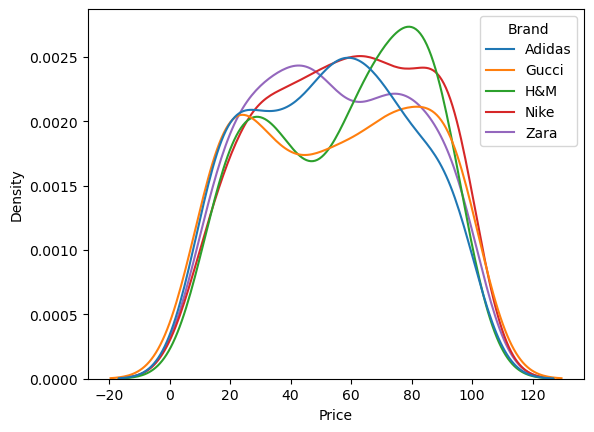

In [35]:
#visualizing distribution of price across brands
sns.kdeplot(data = data, x = 'Price', hue ='Brand')
plt.show()

In [94]:
# Performing Kruskal-Wallis Test since distribution is not a normal distribution
from scipy.stats import kruskal

#create list of brands
product_brands = data['Brand'].unique()

#create a list of groups for each rating scale
groups = [data[data['Brand'] == brands]['Price'] for brands in product_brands]

k_stat, p_val = kruskal(*groups)
print(f"P-value : {p_val}")

P-value : 0.4420470786225822


In [93]:
#using the one-way anova test
from scipy.stats import f_oneway

f_stat, p_val = f_oneway(*groups)
print(f_stat)
print(p_val)

0.9256693202136209
0.44819627484204827


In [38]:
# #using same test in another way to explain for general use.
# from scipy.stats import f_oneway

# f_stat, p_val = f_oneway(
#     data[data['Brand']== 'Adidas']['Price'],
#     data[data['Brand']== 'Nike']['Price'],
#     data[data['Brand']== 'Gucci']['Price'],
#     data[data['Brand']== 'H&M']['Price'],
#     data[data['Brand']== 'Zara']['Price']
# )
# print(f_stat)
# print(p_val)

In [39]:
#confirming null hypothesis
if (p_val <=alpha):
    print("REJECT NULL HYPOTHESIS")
else:
    print("FAIL TO REJECT THE NULL HYPOTHESIS")

REJECT NULL HYPOTHESIS


##### Overall Analysis
- The relatively low p-value implies that based on the data provided, we cannot confidently assert that different brands lead to different mean increases in sales' prices. So, the marketing manager's proposal cannot be entirely right.
 

## Part 3: The Backend Development Team

##### Scenario - Choosing the right machine learning algorithm

Lavender Lane, just like every thriving business wants to give its users the best digital experience so the backend web development team was tasked to integrate machine learning into the web app to help users predict the prices of products when they visit the business website.

However, although the team can integrate the model, they are short of machine learning engineers so have requested help from the team of analysts with machine learning experience to recommend the best machine learning algorithm for them to proceed with their work. 

In [40]:
#extracting columns
data = data[['Category', 'Brand', 'Product', 'Color', 'Size', 'Price']]
data

,Category,Brand,Product,Color,Size,Price
0,Men's Fashion,Adidas,Dress,Black,XL,40.0
1,Women's Fashion,H&M,Shoes,Black,L,82.0
2,Women's Fashion,Adidas,Dress,Yellow,XL,44.0
3,Men's Fashion,Zara,Shoes,White,S,23.0
4,Men's Fashion,Adidas,T-shirt,Black,M,79.0
...,...,...,...,...,...,...
995,Women's Fashion,Zara,Shoes,Black,M,55.0
996,Kids' Fashion,Nike,Sweater,Green,L,13.0
997,Men's Fashion,Zara,Sweater,White,L,47.0
998,Women's Fashion,Zara,T-shirt,Blue,S,68.0


In [41]:
#saving ready data to csv
data.to_csv('cleaned_data.csv', index=False)

In [42]:
#loading ready data
data = pd.read_csv('cleaned_data.csv')

In [43]:
# Encode each categorical column using One-hot encoding for 'Product', 'Brand', and 'Category' columns
data_encoded = pd.get_dummies(data, columns=['Category', 'Brand', 'Product', 'Color', 'Size'], dtype=int)
data_encoded.head(3)

,Price,Category_Kids' Fashion,Category_Men's Fashion,Category_Women's Fashion,Brand_Adidas,Brand_Gucci,Brand_H&M,Brand_Nike,Brand_Zara,Product_Dress,...,Color_Black,Color_Blue,Color_Green,Color_Red,Color_White,Color_Yellow,Size_L,Size_M,Size_S,Size_XL
0,40.0,0,1,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
1,82.0,0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,44.0,0,0,1,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1


In [44]:
# #saving the binary format of the data
# data_encoded.to_csv('cleaned_ml_fashion_data_encoded.csv', index=False)

In [45]:
#replacing encoded numbers with desired number
data_encoded['Color_Yellow'] = data_encoded['Color_Yellow'].replace(1, 6)
data_encoded['Color_Yellow']    #replacing yellow color = 6

0      0
1      0
2      6
3      0
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: Color_Yellow, Length: 1000, dtype: int32

In [46]:
#assigning number codes to color white
data_encoded['Color_Yellow_White'] = np.where(data_encoded['Color_Yellow'] != 0, data_encoded['Color_Yellow'], data_encoded['Color_White'])

#replacing 5 for white color
data_encoded['Color_Yellow_White'] = data_encoded['Color_Yellow_White'].replace(1, 5)  #white color = 5

In [47]:
#assigning number code to color red
data_encoded['Color_Yellow_White_Red'] = np.where(data_encoded['Color_Yellow_White'] !=0, data_encoded['Color_Yellow_White'], data_encoded['Color_Red'])

#assigning 4 to color red
data_encoded['Color_Yellow_White_Red'] = data_encoded['Color_Yellow_White_Red'].replace(1, 4) #red color = 4

In [48]:
#assigning number codes to color green
data_encoded['Color_Yellow_White_Red_Green'] = np.where(data_encoded['Color_Yellow_White_Red'] !=0, data_encoded['Color_Yellow_White_Red'], data_encoded['Color_Green'])

#assigning 3 to color green
data_encoded['Color_Yellow_White_Red_Green'] = data_encoded['Color_Yellow_White_Red_Green'].replace(1, 3)    #green color = 3

In [49]:
#assigning number code to color blue
data_encoded['Color_Yellow_White_Red_Green_Blue'] = np.where(data_encoded['Color_Yellow_White_Red_Green'] !=0, data_encoded['Color_Yellow_White_Red_Green'], data_encoded['Color_Blue'])

#assigning 2 to color blue
data_encoded['Color_Yellow_White_Red_Green_Blue'] = data_encoded['Color_Yellow_White_Red_Green_Blue'].replace(1, 2)     #blue color = 2

In [50]:
#assigning number 1 code to black
data_encoded['Color_Yellow_White_Red_Green_Blue_Black'] = np.where(data_encoded['Color_Yellow_White_Red_Green_Blue'] != 0, data_encoded['Color_Yellow_White_Red_Green_Blue'], data_encoded['Color_Black'])
data_encoded['Color_Yellow_White_Red_Green_Blue_Black']    #black color is 1

0      1
1      1
2      6
3      5
4      1
      ..
995    1
996    3
997    5
998    2
999    5
Name: Color_Yellow_White_Red_Green_Blue_Black, Length: 1000, dtype: int32

In [51]:
data_encoded.head(3)

,Price,Category_Kids' Fashion,Category_Men's Fashion,Category_Women's Fashion,Brand_Adidas,Brand_Gucci,Brand_H&M,Brand_Nike,Brand_Zara,Product_Dress,...,Color_Yellow,Size_L,Size_M,Size_S,Size_XL,Color_Yellow_White,Color_Yellow_White_Red,Color_Yellow_White_Red_Green,Color_Yellow_White_Red_Green_Blue,Color_Yellow_White_Red_Green_Blue_Black
0,40.0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
1,82.0,0,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,44.0,0,0,1,1,0,0,0,0,1,...,6,0,0,0,1,6,6,6,6,6


In [52]:
#dropping individual color columns
data_encode = data_encoded.drop(columns = ['Color_Yellow','Color_Yellow_White', 'Color_Yellow_White_Red', 'Color_Yellow_White_Red_Green', 'Color_Yellow_White_Red_Green_Blue'])

#renaming merged colors column
data_encode.rename(columns = {'Color_Yellow_White_Red_Green_Blue_Black' : 'Color'}, inplace = True)
data_encode.head(3)

,Price,Category_Kids' Fashion,Category_Men's Fashion,Category_Women's Fashion,Brand_Adidas,Brand_Gucci,Brand_H&M,Brand_Nike,Brand_Zara,Product_Dress,...,Color_Black,Color_Blue,Color_Green,Color_Red,Color_White,Size_L,Size_M,Size_S,Size_XL,Color
0,40.0,0,1,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,1
1,82.0,0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,1
2,44.0,0,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,6


#### Category Codes

In [53]:
#encoding kids as 0, women as 1 and men as 2
data_encode["Category_Men's Fashion"] = data_encode["Category_Men's Fashion"].replace(1, 2) #men
data_encode["Category_Men's Fashion"]

0      2
1      0
2      0
3      2
4      2
      ..
995    0
996    0
997    2
998    0
999    0
Name: Category_Men's Fashion, Length: 1000, dtype: int32

In [54]:
#merging individual encoded category into one
data_encode["Category"] = np.where(data_encode["Category_Men's Fashion"] != 0, data_encode["Category_Men's Fashion"], data_encode["Category_Women's Fashion"])
data_encode["Category"] # men = 2, women = 1 and kids = 0

0      2
1      1
2      1
3      2
4      2
      ..
995    1
996    0
997    2
998    1
999    1
Name: Category, Length: 1000, dtype: int32

In [55]:
#merging individual encoded category into one
data_encode["Category"] = np.where(data_encode["Category_Men's Fashion"] != 0, data_encode["Category_Men's Fashion"], data_encode["Category_Women's Fashion"])
data_encode["Category"] # men = 2, women = 1 and kids = 0

0      2
1      1
2      1
3      2
4      2
      ..
995    1
996    0
997    2
998    1
999    1
Name: Category, Length: 1000, dtype: int32

In [56]:
#preview encoded data
data_encode

,Price,Category_Kids' Fashion,Category_Men's Fashion,Category_Women's Fashion,Brand_Adidas,Brand_Gucci,Brand_H&M,Brand_Nike,Brand_Zara,Product_Dress,...,Color_Blue,Color_Green,Color_Red,Color_White,Size_L,Size_M,Size_S,Size_XL,Color,Category
0,40.0,0,2,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,2
1,82.0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,1
2,44.0,0,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,6,1
3,23.0,0,2,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,5,2
4,79.0,0,2,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,55.0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,1
996,13.0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,3,0
997,47.0,0,2,0,0,0,0,0,1,0,...,0,0,0,1,1,0,0,0,5,2
998,68.0,0,0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,2,1


In [57]:
#since category is merged into one, drop individual category
data_cleaned = data_encode.drop(columns = ["Category_Kids' Fashion", "Category_Men's Fashion", "Category_Women's Fashion"])
data_cleaned

,Price,Brand_Adidas,Brand_Gucci,Brand_H&M,Brand_Nike,Brand_Zara,Product_Dress,Product_Jeans,Product_Shoes,Product_Sweater,...,Color_Blue,Color_Green,Color_Red,Color_White,Size_L,Size_M,Size_S,Size_XL,Color,Category
0,40.0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,2
1,82.0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,1
2,44.0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,6,1
3,23.0,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,1,0,5,2
4,79.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,55.0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,1
996,13.0,0,0,0,1,0,0,0,0,1,...,0,1,0,0,1,0,0,0,3,0
997,47.0,0,0,0,0,1,0,0,0,1,...,0,0,0,1,1,0,0,0,5,2
998,68.0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,2,1


#### Brand Codes

In [58]:
#creating specific encoded labels for brand Zara
data_cleaned['Brand_Zara'] = data_cleaned['Brand_Zara'].replace(1, 5) #zara
data_cleaned['Brand_Zara']  #Zara = 5

0      0
1      0
2      0
3      5
4      0
      ..
995    5
996    0
997    5
998    5
999    0
Name: Brand_Zara, Length: 1000, dtype: int32

In [59]:
#repeat step for brand Nike
data_cleaned['Nike_Zara'] = np.where(data_cleaned['Brand_Zara'] != 0, data_cleaned['Brand_Zara'], data_cleaned['Brand_Nike'])
data_cleaned['Nike_Zara'] = data_cleaned['Nike_Zara'].replace(1, 4) 
data_cleaned['Nike_Zara']       #Nike = 4

0      0
1      0
2      0
3      5
4      0
      ..
995    5
996    4
997    5
998    5
999    0
Name: Nike_Zara, Length: 1000, dtype: int32

In [60]:
#same for brand H&M
data_cleaned['Nike_Zara_H&M'] = np.where(data_cleaned['Nike_Zara'] != 0, data_cleaned['Nike_Zara'], data_cleaned['Brand_H&M'])
data_cleaned['Nike_Zara_H&M'] = data_cleaned['Nike_Zara_H&M'].replace(1, 3)
data_cleaned['Nike_Zara_H&M']    #H&M = 3

0      0
1      3
2      0
3      5
4      0
      ..
995    5
996    4
997    5
998    5
999    0
Name: Nike_Zara_H&M, Length: 1000, dtype: int32

In [61]:
#same for brand Gucci
data_cleaned['Nike_Zara_H&M_Gucci'] = np.where(data_cleaned['Nike_Zara_H&M']  != 0, data_cleaned['Nike_Zara_H&M'] , data_cleaned['Brand_Gucci'])
data_cleaned['Nike_Zara_H&M_Gucci'] = data_cleaned['Nike_Zara_H&M'].replace(1, 2)
data_cleaned['Nike_Zara_H&M_Gucci']    #Gucci = 2

0      0
1      3
2      0
3      5
4      0
      ..
995    5
996    4
997    5
998    5
999    0
Name: Nike_Zara_H&M_Gucci, Length: 1000, dtype: int32

In [62]:
#same for brand Adidas
data_cleaned['Nike_Zara_H&M_Gucci_Adidas'] = np.where(data_cleaned['Nike_Zara_H&M_Gucci']  != 0, data_cleaned['Nike_Zara_H&M_Gucci'] , data_cleaned['Brand_Adidas'])
data_cleaned['Nike_Zara_H&M_Gucci_Adidas']    #Adidas = 1

0      1
1      3
2      1
3      5
4      1
      ..
995    5
996    4
997    5
998    5
999    1
Name: Nike_Zara_H&M_Gucci_Adidas, Length: 1000, dtype: int32

In [63]:
#since brand is merged into one, drop individual brands and assign a new variable
data_clean = data_cleaned.drop(columns = ["Brand_Adidas", "Brand_Gucci", "Brand_H&M","Brand_Zara", "Brand_Nike", 
                                          "Nike_Zara", "Nike_Zara_H&M", "Nike_Zara_H&M_Gucci"])

#rename the brands merged as Brands_merged
data_clean.rename(columns ={"Nike_Zara_H&M_Gucci_Adidas": "Brand"}, inplace= True)
data_clean

,Price,Product_Dress,Product_Jeans,Product_Shoes,Product_Sweater,Product_T-shirt,Color_Black,Color_Blue,Color_Green,Color_Red,Color_White,Size_L,Size_M,Size_S,Size_XL,Color,Category,Brand
0,40.0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,2,1
1,82.0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,3
2,44.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,6,1,1
3,23.0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,5,2,5
4,79.0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,55.0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,1,5
996,13.0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,3,0,4
997,47.0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,5,2,5
998,68.0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,2,1,5


#### Size Codes

In [64]:
#assigning number codes to sizes
data_clean['Size_XL'] = data_clean['Size_XL'].replace(1, 3)  #Xl = 3
data_clean['Size_XL']

0      3
1      0
2      3
3      0
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: Size_XL, Length: 1000, dtype: int32

In [65]:
#assigning number codes to size L
data_clean['Size_XL_L'] = np.where(data_clean['Size_XL'] !=0, data_clean['Size_XL'], data_clean['Size_L'])

#replacing 1 with 2
data_clean['Size_XL_L'] = data_clean['Size_XL_L'].replace(1, 2)   #L = 2
data_clean['Size_XL_L']

0      3
1      2
2      3
3      0
4      0
      ..
995    0
996    2
997    2
998    0
999    2
Name: Size_XL_L, Length: 1000, dtype: int32

In [66]:
#assigning number codes to size M
data_clean['Size_XL_L_M'] = np.where(data_clean['Size_XL_L'] !=0, data_clean['Size_XL_L'], data_clean['Size_M'])

#replacing 1 with 8
data_clean['Size_XL_L_M'] = data_clean['Size_XL_L_M'].replace(1, 8)   #temporal for M
data_clean['Size_XL_L_M']

0      3
1      2
2      3
3      0
4      8
      ..
995    8
996    2
997    2
998    0
999    2
Name: Size_XL_L_M, Length: 1000, dtype: int32

In [67]:
#assigning number codes to size S
data_clean['Size_XL_L_M_S'] = np.where(data_clean['Size_XL_L_M'] !=0, data_clean['Size_XL_L_M'], data_clean['Size_S'])

#replacing 1 with 7
data_clean['Size_XL_L_M_S'] = data_clean['Size_XL_L_M'].replace(1, 7)   #temporal
data_clean['Size_XL_L_M_S']

0      3
1      2
2      3
3      0
4      8
      ..
995    8
996    2
997    2
998    0
999    2
Name: Size_XL_L_M_S, Length: 1000, dtype: int32

In [68]:
#replacing Medium and small codes with their right assigned codes
data_clean['Size_XL_L_M_S'] = data_clean['Size_XL_L_M_S'].replace(8, 1)  #for medium M= 1
data_clean['Size_XL_L_M_S'] = data_clean['Size_XL_L_M_S'].replace(7, 0)  #for small S = 0

In [69]:
#previewing data_clean
data_clean.rename(columns = {'Size_XL_L_M_S' : 'Size'}, inplace = True)
data_clean.head(3)

,Price,Product_Dress,Product_Jeans,Product_Shoes,Product_Sweater,Product_T-shirt,Color_Black,Color_Blue,Color_Green,Color_Red,...,Size_L,Size_M,Size_S,Size_XL,Color,Category,Brand,Size_XL_L,Size_XL_L_M,Size
0,40.0,1,0,0,0,0,1,0,0,0,...,0,0,0,3,1,2,1,3,3,3
1,82.0,0,0,1,0,0,1,0,0,0,...,1,0,0,0,1,1,3,2,2,2
2,44.0,1,0,0,0,0,0,0,0,0,...,0,0,0,3,6,1,1,3,3,3


In [70]:
#replacing jeans code
data_clean['Product_Jeans'] = data_clean['Product_Jeans'].replace(1, 2) #temporal jeans code -7
data_clean['Product_Jeans'].unique()

array([0, 2])

In [71]:
#pairing shoes code with jeans
data_clean['Product'] = np.where(data_clean['Product_Jeans'] != 0, data_clean['Product_Jeans'], data_clean['Product_Shoes'])

#replacing shoes code
data_clean['Product'] = data_clean['Product'].replace(1,3)
data_clean['Product']   #shoes code = 3

0      0
1      3
2      0
3      3
4      0
      ..
995    3
996    0
997    0
998    0
999    3
Name: Product, Length: 1000, dtype: int32

In [72]:
#pairing sweater code with jeans
data_clean['Product'] = np.where(data_clean['Product'] != 0, data_clean['Product'], data_clean['Product_Sweater'])

#replacing sweater code with 4
data_clean['Product'] = data_clean['Product'].replace(1,4)
data_clean['Product']

0      0
1      3
2      0
3      3
4      0
      ..
995    3
996    4
997    4
998    0
999    3
Name: Product, Length: 1000, dtype: int32

In [73]:
#pairing T-shirt code with the others
data_clean['Product'] = np.where(data_clean['Product'] != 0, data_clean['Product'], data_clean['Product_T-shirt'])

#replacing sweater code with 4
data_clean['Product'] = data_clean['Product'].replace(1,5)
data_clean['Product']     #T-shirt = 5

0      0
1      3
2      0
3      3
4      5
      ..
995    3
996    4
997    4
998    5
999    3
Name: Product, Length: 1000, dtype: int32

In [74]:
#replacing all zeros with 1 for dress code
data_clean['Product'] = data_clean['Product'].replace(0,1)
data_clean.head(10)

,Price,Product_Dress,Product_Jeans,Product_Shoes,Product_Sweater,Product_T-shirt,Color_Black,Color_Blue,Color_Green,Color_Red,...,Size_M,Size_S,Size_XL,Color,Category,Brand,Size_XL_L,Size_XL_L_M,Size,Product
0,40.0,1,0,0,0,0,1,0,0,0,...,0,0,3,1,2,1,3,3,3,1
1,82.0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,1,3,2,2,2,3
2,44.0,1,0,0,0,0,0,0,0,0,...,0,0,3,6,1,1,3,3,3,1
3,23.0,0,0,1,0,0,0,0,0,0,...,0,1,0,5,2,5,0,0,0,3
4,79.0,0,0,0,0,1,1,0,0,0,...,1,0,0,1,2,1,0,8,1,5
5,47.0,1,0,0,0,0,0,0,0,0,...,0,0,0,6,2,1,2,2,2,1
6,37.0,0,2,0,0,0,0,0,0,0,...,0,0,3,5,2,0,3,3,3,2
7,64.0,0,0,0,1,0,0,1,0,0,...,0,0,3,2,0,5,3,3,3,4
8,53.0,0,0,0,1,0,0,0,1,0,...,0,0,3,3,2,3,3,3,3,4
9,55.0,0,0,0,0,1,0,0,0,0,...,0,0,3,5,0,5,3,3,3,5


In [75]:
#saving features as X
prep = data_clean.drop(columns=["Product_Dress", "Product_Jeans", "Product_Shoes", "Product_Sweater", "Product_T-shirt","Color_Red","Color_White", "Color_Blue", "Color_Green","Color_Black","Size_L", "Size_M", "Size_S", "Size_XL", "Size_XL_L", "Size_XL_L_M"], axis = 1)
prep.head(3)

,Price,Color,Category,Brand,Size,Product
0,40.0,1,2,1,3,1
1,82.0,1,1,3,2,3
2,44.0,6,1,1,3,1


In [76]:
#rearranging columns
prep = prep[['Price','Category','Brand','Product','Color','Size']]
prep.head(3)

,Price,Category,Brand,Product,Color,Size
0,40.0,2,1,1,1,3
1,82.0,1,3,3,1,2
2,44.0,1,1,1,6,3


Prepping Data for ML project

In [77]:
#saving features as X and target as y
X = prep.drop(columns = ["Price", "Color", "Size"])
y = prep["Price"]

In [78]:
#preview y
y

0      40.0
1      82.0
2      44.0
3      23.0
4      79.0
       ... 
995    55.0
996    13.0
997    47.0
998    68.0
999    79.0
Name: Price, Length: 1000, dtype: float64

In [79]:
#Splitting our data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### DECISION TREE MODEL


#### Training our model using Decision Tree Regressor

In [80]:
#Instantiate the decision tree regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

#Train our decision tree regression model
reg1= dt_regressor.fit(X_train,y_train)

#predicting price using the decision tree regressor
y_prediction= reg1.predict(X_test)
# y_prediction

In [81]:
#checking error to see how off our model is from the actual price
rmse = np.sqrt(mean_squared_error(y_test, y_prediction))
print("RMSE:", rmse)

RMSE: 27.512231362244982


In [82]:
#predicting price if product is a T-shirt, color is blue, category is men's fashion, brand is H&M and size is medium
#note that array is arranged as Category, Brand, Product
predict_reg = dt_regressor.predict([[2, 3, 5]])
predict_reg   #predicted price same as actual price in catalogue

array([53.09090909])

Predicting prices using the tree regressor gives same price as compared to the tree classifier. Also, the rmse compared to the tree classifier was same. Hence both models are recommendable.

Otherwise stated.

## Linear Regression

In [83]:
#Instantiating the linear regression model
lr = LinearRegression()

#Training our linear regression model
reg= lr.fit(X_train,y_train)

#predicting price using the linear regression model
y_pred= reg.predict(X_test)

In [84]:
#checking error to see how off our model is from the actual
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

RMSE: 26.75441326042035


In [85]:
#predicting price if product is a T-shirt, color is blue, category is men's fashion, brand is H&M and size is medium
#note that array is arranged as Category, Brand, Product
predict_lr = lr.predict([[2, 3, 5]])
predict_lr   #predicted price > actual price

array([54.12181096])

In [86]:
# #importing relevant library to write and read data in vscode
# import pickle

In [87]:
# #prepping data to use in vscode
# mydata = {'model': lr, 'Product': prep['Product'], 'Brand' : prep['Brand'], 'Category' : prep['Category'], 'Color' : prep['Color']}
# with open('saved_steps.pkl', 'wb') as file:
#     pickle.dump(mydata, file)

In [88]:
# #saving the model to use in vscode
# with open('saved_steps.pkl', 'rb') as file:
#     mydata = pickle.load(file)
    
# linearmodel_loaded = mydata['model']
# Product = mydata['Product']
# Brand = mydata['Brand']
# Category = mydata['Category']
# Color = mydata['Color']

In [89]:
# #checking if new variables will give same prediction
# y_prediction = linearmodel_loaded.predict([[2, 3, 5, 2, 1]])
# y_prediction

### RANDOM FOREST MODEL

In [114]:
# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define the model
rf_model = RandomForestRegressor()

# Initialize GridSearchCV
grid_search = GridSearchCV(rf_model, param_grid, cv=7, scoring='neg_mean_squared_error')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions and evaluate RMSE
y_pred = best_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

RMSE: 27.25762169646858


In [126]:
#predicting price if product is a T-shirt, color is blue, category is men's fashion, brand is H&M and size is medium
#note that array is arranged as Category, Brand, Product
predict_lr = grid_search.predict([[2, 3, 5]])
predict_lr   #predicted price > actual price

array([45.7442624])

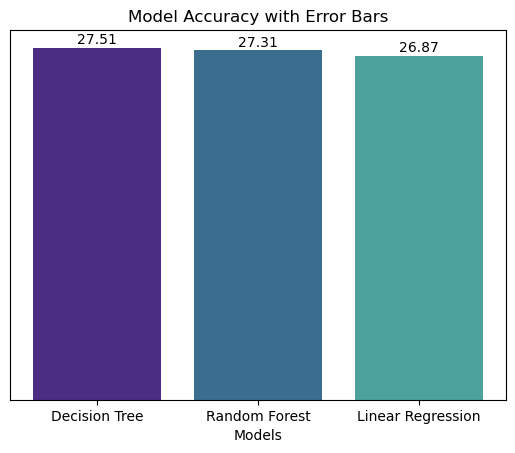

In [127]:
models = ['Linear Regression', 'Decision Tree', 'Random Forest']
mean_accuracy = [26.87, 27.51, 27.31]

# Sort the data in descending order of mean_accuracy
sorted_indices = np.argsort(mean_accuracy)[::-1]
models = [models[i] for i in sorted_indices]
mean_accuracy = [mean_accuracy[i] for i in sorted_indices]


#Plotting a bar chart
plt.bar(models, mean_accuracy, capsize=5, color=["#4B2E83", "#3B6D8F", "#4DA19C"])
plt.xlabel('Models')
plt.ylabel('Mean Accuracy')
plt.title('Model Accuracy with Error Bars')

# Add data labels
for i, value in enumerate(mean_accuracy):
    plt.text(i, value + 0.3, f'{value:.2f}', ha='center')

# Removing y-axis
plt.gca().axes.get_yaxis().set_visible(False)

#Displaying Chart
plt.show()

### MACHINE LEARNING ANALYSIS

To find the best machine learning algorithm to predict the prices of products for our client, we evaluated three different models for this purpose:

- Linear Regression
- Decision Tree
- Random Forest

After comparing predictions from each model, we selected the Linear Regression because it has a lower root mean squared error.

### Conclusion

The data analysis reveals several key insights into the Lavender Lane brand’s performance across products, categories, and brands. There is a clear opportunity to enhance customer satisfaction by focusing on Kids' Fashion, where there is variability in ratings, indicating potential quality inconsistencies. Stable categories like Men’s and Women’s Fashion show room for incremental improvements to further elevate their appeal.

The data analysis also highlights that there is no same approach to tackle a problem. Instead, every problem is handled based on the context of study.

In summary, adopting different data analytics techniques and communicating insights from the data informs the business decisions.
